1. Создайте пайплайн стандартных аугментаций torchvision (например, RandomHorizontalFlip, RandomCrop, ColorJitter, RandomRotation, RandomGrayscale).
2. Примените аугментации к 5 изображениям из разных классов (папка train).
3. Визуализируйте:
   - Оригинал
   - Результат применения каждой аугментации отдельно
   - Результат применения всех аугментаций вместе

Изображение 1, Класс: Гароу


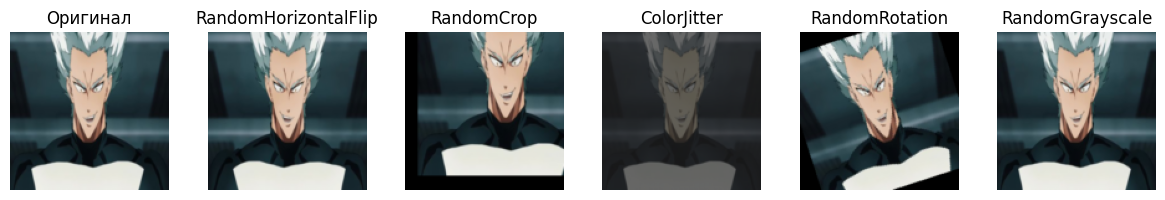

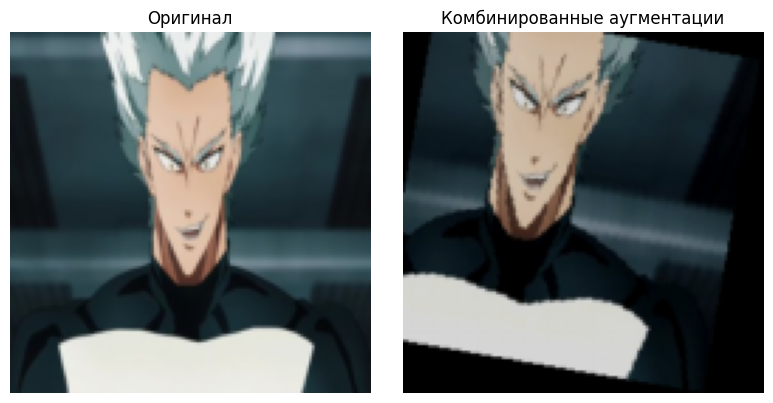

Изображение 2, Класс: Генос


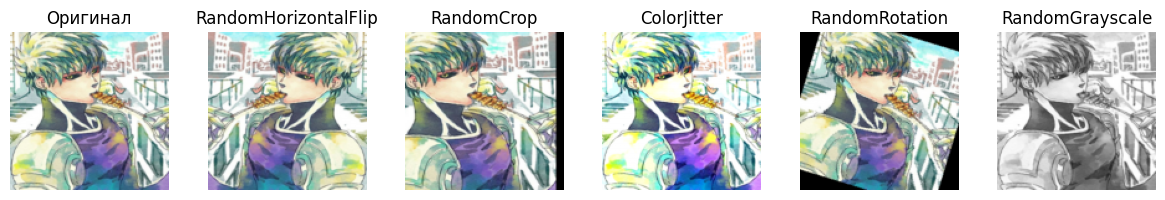

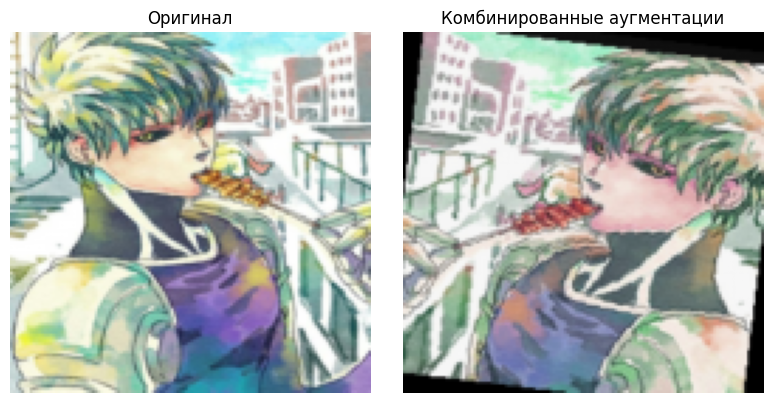

Изображение 3, Класс: Сайтама


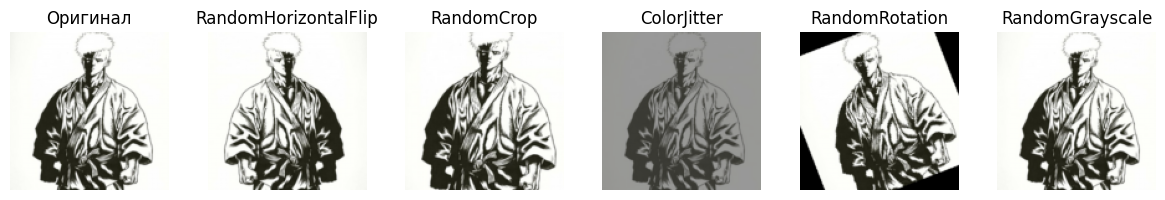

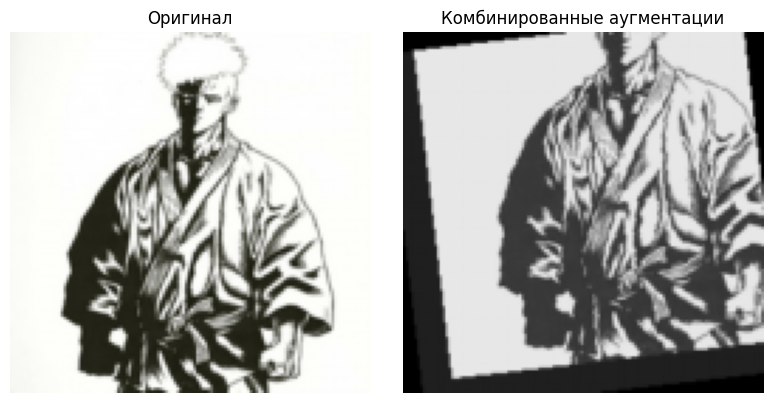

Изображение 4, Класс: Соник


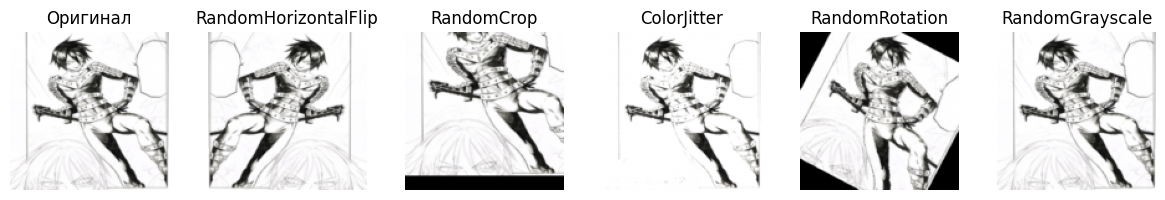

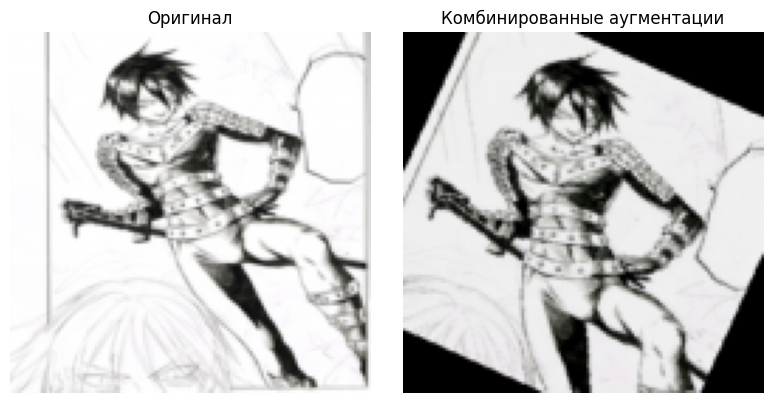

Изображение 5, Класс: Татсумаки


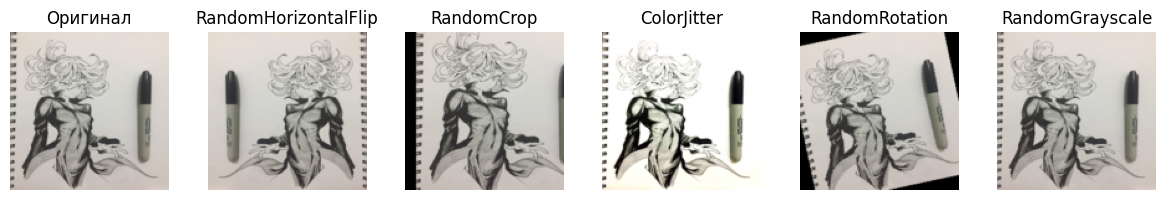

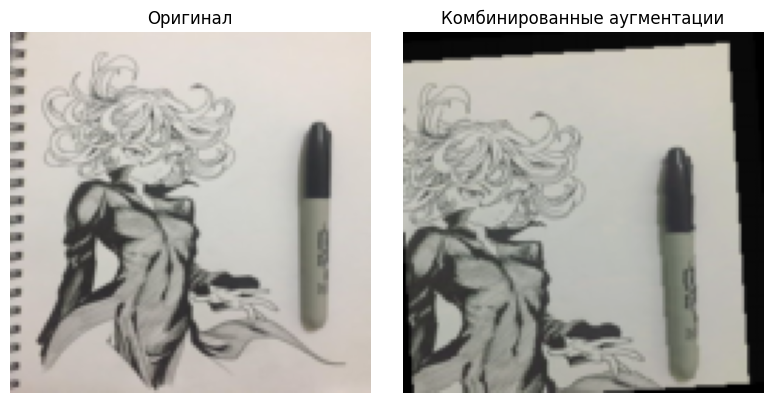

In [53]:
from datasets import CustomImageDataset
from utils import show_single_augmentation, show_multiple_augmentations
from torchvision import transforms
import torch

# Загрузка датасета
root = 'data/train'
dataset = CustomImageDataset(root, transform=None, target_size=(224, 224))
class_names = dataset.get_class_names()

# Стандартные аугментации
standard_augs = {
    "RandomHorizontalFlip": transforms.RandomHorizontalFlip(p=1.0),
    "RandomCrop": transforms.RandomCrop(200, padding=20),
    "ColorJitter": transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1),
    "RandomRotation": transforms.RandomRotation(degrees=30),
    "RandomGrayscale": transforms.RandomGrayscale(p=0.3)
}

combined_aug = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(200, padding=20),
    transforms.ColorJitter(0.3, 0.3, 0.3, 0.1),
    transforms.RandomRotation(25),
    transforms.RandomGrayscale(p=0.2),
    transforms.ToTensor()
])

seen_classes = set()
selected_imgs = []

for img, label in dataset:
    class_name = class_names[label]
    if class_name not in seen_classes:
        seen_classes.add(class_name)
        selected_imgs.append((img, label))
    if len(seen_classes) == 5:
        break

# Визуализация
for idx, (img, label) in enumerate(selected_imgs):
    print(f"Изображение {idx+1}, Класс: {class_names[label]}")
    
    # Отдельные аугментации
    aug_imgs = []
    titles = []
    for name, aug in standard_augs.items():
        t = transforms.Compose([aug, transforms.ToTensor()])
        aug_img = t(img)
        aug_imgs.append(aug_img)
        titles.append(name)
    
    # Комбинированная аугментация
    combined_img = combined_aug(img)
    
    show_multiple_augmentations(transforms.ToTensor()(img), aug_imgs, titles)
    show_single_augmentation(transforms.ToTensor()(img), combined_img, "Комбинированные аугментации")